<a href="https://colab.research.google.com/github/steven-mpawulo/KWS_NLP_DeepLearning/blob/main/KWS_NLP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np 
import librosa
import librosa.display
from glob import glob
import IPython.display as ipd
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers


In [3]:
df = pd.read_csv('/content/drive/MyDrive/KWS Dataset/Train.csv')

In [4]:
df

,fn,label
0,audio_files/IV38R7F.wav,akawuka
1,audio_files/KM4SKWT.wav,banana
2,audio_files/F5POSU9.wav,obulwadde
3,audio_files/MMVDXG2.wav,nnyaanya
4,audio_files/9TVM96F.wav,pampu
...,...,...
1104,audio_files/QNZECA9.wav,cassava
1105,audio_files/GUIY718.wav,harvesting
1106,audio_files/W38UIGC.wav,farm
1107,audio_files/E04FSN7.wav,nakavundira


In [ ]:
# !unzip "/content/drive/MyDrive/KWS Dataset/audio_files.zip" -d "/content/drive/MyDrive/audio_files"

In [ ]:
# !unzip "/content/drive/MyDrive/KWS Dataset/AdditionalUtterances.zip" -d "/content/drive/MyDrive/more_audio_files"

In [ ]:
# !unzip "/content/drive/MyDrive/KWS Dataset/nlp_keywords_29Oct2020.zip" -d "/content/drive/MyDrive/nlp_keywords"

In [5]:
files =  glob('/content/drive/MyDrive/audio_files/audio_files/*.wav')

In [6]:
len(files)

2126

In [7]:
ipd.Audio(files[30])

In [8]:
data, sr = librosa.load(files[30])

In [9]:
new = pd.Series(data)

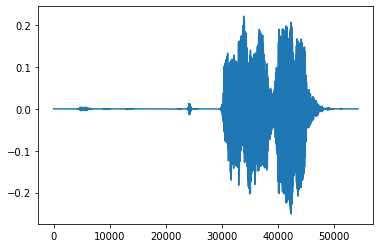

In [10]:
new.plot()

In [11]:
D = librosa.stft(data)

In [12]:
s_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

In [13]:
s_db.shape

(1025, 106)

In [14]:
m = s_db[:, :119]

In [15]:
w = np.resize(s_db,(1025, 119))

In [16]:
w.shape

(1025, 119)

In [17]:
m.shape

(1025, 106)

In [ ]:
s_db

array([[-80.      , -80.      , -80.      , ..., -74.94852 , -67.35315 ,
        -68.70113 ],
       [-80.      , -80.      , -80.      , ..., -76.020775, -69.394936,
        -72.21218 ],
       [-80.      , -80.      , -80.      , ..., -73.385056, -78.47385 ,
        -76.5315  ],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)

In [ ]:
s_db.dtype

dtype('float32')

In [ ]:
new_s_db = w.reshape(1025, 119, 1)

In [ ]:
new_s_db.shape

(1025, 119, 1)

In [ ]:
s_db.dtype

dtype('float32')

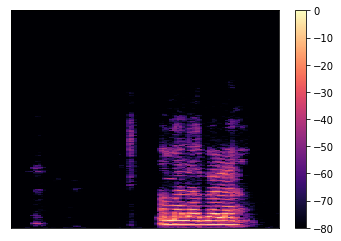

In [ ]:
plt.figure()
librosa.display.specshow(s_db)
plt.colorbar()

In [ ]:
# audioList = []
# labelList = []
# def convertAudioToSpec(filename, label):
#   pathToDirectory = "/content/drive/MyDrive/audio_files/"
#   path = pathToDirectory+filename
#   data, sr = librosa.load(path)
#   D = librosa.stft(data)
#   s_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
#   audioList.append(s_db)
#   labelList.append(label)

#   return {"audio": np.array(audioList, dtype="float32"), "label": labelList}

# result = convertAudioToSpec("audio_files/5A9LAVW.wav", "amakoola")
# # print(result["audio"][0])
# me = result["audio"][0]
# me.shape
# me.dtype

# audioList = []
# labelList = []



In [18]:
def convertAudioToSpec(filename, label):
  pathToDirectory = "/content/drive/MyDrive/audio_files/"
  path = pathToDirectory+filename
  data, sr = librosa.load(path)
  D = librosa.stft(data)
  s_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
  m=np.resize(s_db,(1025, 119))
  audioList.append(m)
  labelList.append(label)

  return {"audio": audioList, "label": labelList}

In [19]:
audioList = []
labelList = []
for row in df.itertuples(index=False, name="Audio"):
  convertAudioToSpec(row[0], row[1])
  



In [20]:
dataSet = {"audio": audioList, "label": labelList}


In [21]:
converted_dataSet = pd.DataFrame(dataSet)

In [22]:
converted_dataSet

,audio,label
0,"[[-73.788025, -72.21732, -72.72653, -77.87556,...",akawuka
1,"[[-36.703674, -36.163845, -46.680695, -38.8547...",banana
2,"[[-45.370476, -34.852722, -36.91722, -41.60593...",obulwadde
3,"[[-57.261032, -61.148415, -72.01228, -62.37511...",nnyaanya
4,"[[-57.081856, -53.301334, -61.52352, -61.24991...",pampu
...,...,...
1104,"[[-9.443516, -24.318357, -17.916576, -25.05192...",cassava
1105,"[[-76.86399, -78.66565, -80.0, -80.0, -80.0, -...",harvesting
1106,"[[-35.645557, -41.80309, -59.911995, -80.0, -4...",farm
1107,"[[-50.515064, -46.423054, -44.530285, -47.2941...",nakavundira


In [23]:
encoder = LabelEncoder()

In [24]:
converted_dataSet["label"] = encoder.fit_transform(converted_dataSet["label"])

In [25]:
converted_dataSet

,audio,label
0,"[[-73.788025, -72.21732, -72.72653, -77.87556,...",10
1,"[[-36.703674, -36.163845, -46.680695, -38.8547...",16
2,"[[-45.370476, -34.852722, -36.91722, -41.60593...",141
3,"[[-57.261032, -61.148415, -72.01228, -62.37511...",137
4,"[[-57.081856, -53.301334, -61.52352, -61.24991...",169
...,...,...
1104,"[[-9.443516, -24.318357, -17.916576, -25.05192...",22
1105,"[[-76.86399, -78.66565, -80.0, -80.0, -80.0, -...",97
1106,"[[-35.645557, -41.80309, -59.911995, -80.0, -4...",87
1107,"[[-50.515064, -46.423054, -44.530285, -47.2941...",129


In [26]:
X = converted_dataSet['audio']
y = converted_dataSet['label']

In [ ]:
y.nunique()

193

In [ ]:
e = tf.constant(4)

In [27]:
wel = X[0]
wel.shape

(1025, 119)

In [ ]:
wel = wel.reshape(1025, 119,1)

In [ ]:
wel.shape

(1025, 119, 1)

In [ ]:
b = tf.constant(wel, )

In [ ]:
b.shape

TensorShape([1025, 119, 1])

In [28]:
tensorList = []
shapeList = []
for x in X:
  # print(x.shape[1])
  x = x.reshape(1025, 119,1)
  x = tf.constant(x, shape=(1025, 119,1))
  tensorList.append(x)
  # if (x.shape[1] == 44):
  #   x = x.reshape(1025, 44,1)
  #   x = tf.constant(x, shape=(1025, 44, 1))
  #   tensorList.append(x)
  # # elif (x.shape[1] == 47):
  #   x = x.reshape(1025, 47,1)
  #   x = tf.constant(x, shape=(1025, 47, 1))
  #   tensorList.append(x)
  # elif (x.shape[1] == 57):
  #   x = x.reshape(1025, 57,1)
  #   x = tf.constant(x, shape=(1025, 57, 1))
  #   tensorList.append(x)
  # elif (x.shape[1] == 86):
  #   x = x.reshape(1025, 86,1)
  #   x = tf.constant(x, shape=(1025, 86, 1))
  #   tensorList.append(x)
  # elif (x.shape[1] == 101):
  #   x = x.reshape(1025, 101,1)
  #   x = tf.constant(x, shape=(1025, 101, 1))
  #   tensorList.append(x)
  # elif (x.shape[1] == 104):
  #   x = x.reshape(1025, 104,1)
  #   x = tf.constant(x, shape=(1025, 104, 1))
  #   tensorList.append(x)


In [29]:
len(tensorList)

1109

In [57]:
labelList = []
for i in y:
  labelList.append(i)


In [58]:
len(labelList)

1109

In [59]:
ll = tf.keras.utils.to_categorical(labelList)

In [81]:
ll.shape

(1109, 193)

In [61]:
new_ll = tf.constant(ll,)

In [71]:
newAudioLabel = np.array(new_ll)

In [72]:
newAudioLabel[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.], dtype=float32)

In [95]:
audioLabel = np.array(labelList).astype('float32')

In [96]:
audioLabel.shape

(1109,)

In [84]:
audioLabel[0]

10

In [69]:
audioData = np.array(tensorList)

In [70]:
audioData.shape

(1109, 1025, 119, 1)

In [ ]:
# shapes = np.array(shapeList)

In [ ]:
# np.unique(shapes)

In [ ]:
# X.dtype

In [ ]:
# new_array = X.to_numpy()

In [ ]:
# new_array.dtype

In [ ]:
# X.shape

In [85]:
Xtrain, Xval, ytrain, yval = train_test_split(audioData,audioLabel, test_size=0.2)

In [74]:
Xtrain.shape

(887, 1025, 119, 1)

In [39]:
Xval.shape

(222, 1025, 119, 1)

In [86]:
ytrain.shape

(887,)

In [87]:
yval.shape

(222,)

In [97]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(1025, 119, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(193, activation='softmax'))

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 1023, 117, 32)     320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 511, 58, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 509, 56, 64)       18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 254, 28, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 252, 26, 128)      73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 126, 13, 128)    

In [98]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [99]:
EPOCHS = 20

history = model.fit(Xtrain, ytrain, epochs = EPOCHS)

Epoch 1/20
28/28 [==============================] - 7s 168ms/step - loss: 15.8601 - accuracy: 0.0034
Epoch 2/20
28/28 [==============================] - 3s 124ms/step - loss: 5.2604 - accuracy: 0.0068
Epoch 3/20
28/28 [==============================] - 3s 125ms/step - loss: 5.2577 - accuracy: 0.0068
Epoch 4/20
28/28 [==============================] - 3s 124ms/step - loss: 5.2546 - accuracy: 0.0068
Epoch 5/20
28/28 [==============================] - 3s 124ms/step - loss: 5.2510 - accuracy: 0.0090
Epoch 6/20
28/28 [==============================] - 3s 124ms/step - loss: 5.2461 - accuracy: 0.0113
Epoch 7/20
28/28 [==============================] - 3s 124ms/step - loss: 5.2408 - accuracy: 0.0068
Epoch 8/20
28/28 [==============================] - 3s 123ms/step - loss: 5.2336 - accuracy: 0.0113
Epoch 9/20
28/28 [==============================] - 3s 124ms/step - loss: 5.2259 - accuracy: 0.0113
Epoch 10/20
28/28 [==============================] - 3s 123ms/step - loss: 5.2184 - accuracy: 0.010

In [100]:
results = model.evaluate(Xval, yval)

7/7 [==============================] - 1s 148ms/step - loss: 5.3324 - accuracy: 0.0090
